# Ganの学習における勾配法について
### Ganの学習はゲーム理論に基づき、二人のプレイヤーが値を最小化したいということを行います。
### ここでは、例として

### $$ f = xy - 5$$
### $$ h = -xy + 5$$
### としてプレイヤー1はfを、プレイヤー2はhを最適な値に、すなわち、最小化したいとします。
### また、プレイヤー1はxをプレイヤー2はyを動かすことができるとします。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#プレイヤー1
def f(x,y):
    return x*y - 5

In [3]:
#プレイヤー2
def h(x,y):
    return -x*y+5

***

### ここで、一度、勾配法を確認しておきましょう。
### 勾配法は関数の傾きを元に値を小さくしていく手法です。
### 関数$$y = x^2 - 8x + 12$$を考えます。

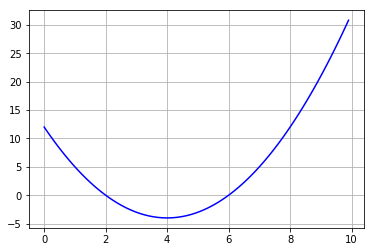

In [4]:
def plot_y():
    def func_y(x):
        return x*x-8*x+12
    
    #xの作成
    x = np.arange(0,10,0.1)
    y = func_y(x)
    plt.plot(x,y,color="blue")
    plt.grid()
    plt.show()
plot_y()

### この関数の傾きは$$\frac{dy}{dx} = 2x-8$$で与えられます。
### 例えば、$x=1$および$x=8$での傾きは次のようになります。

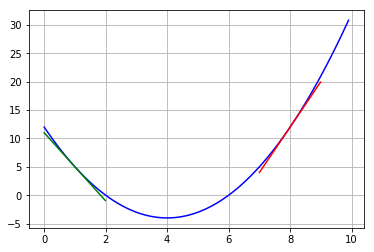

In [5]:
def plot_y_dy():
    def func_y(x):
        return x*x-8*x+12
    def func_dy(x):
        return 2*x-8
    
    #元の関数の値
    #xの作成
    x = np.arange(0,10,0.1)
    y = func_y(x)
    plt.plot(x,y,color="blue")
    plt.grid()
    
    #表示用のxをずらしたもの
    dx = np.arange(-1,1,0.01)
    #微分した関数におけるx=1での傾き
    y = func_y(1)
    dy1 = func_dy(1)
    plt.plot(1+dx,dy1*dx+y,color="green")
    
    #微分した関数におけるx=8での値
    y = func_y(8)
    dy2 = func_dy(8)
    plt.plot(8+dx,dy2*dx+y,color="red")
    plt.show()
plot_y_dy()

### これらの点(x=1, x=8)からスタートしてyを最小するにはどうすればよいでしょうか？
### 上のグラフから分かるようにx=1の時は正に近づけ、x=8のときは負に近づければ良いことがわかります。

### いま、x=1の時の傾きは$$2*(1)-8 = -6 < 0$$
### x=8の時の傾きは$$2*(8) - 8 = 8 >0$$
### となります。
### つまり、<strong>傾きの逆</strong>に進めることによって最適なx(yが最小となる点)を求めることができます。
### これを一般化して、ある定数$ \eta$を進める<strong>量</strong>として
## $$x^{t+1} = x^t - \eta\frac{dy}{dx} $$
### とすることで任意の値から最適な値へ近づけることができます。これが勾配法です。

***

### では本題のganにおけるナッシュ均衡について考えていきましょう
### プレイヤー1およびプレイヤー2の関数の変化は次のようになります。

In [6]:
from mpl_toolkits.mplot3d import Axes3D

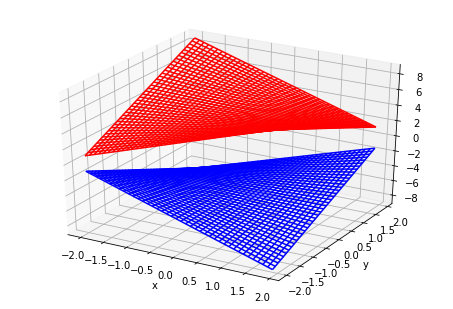

In [7]:
def plot_p1_p2():
    x = np.arange(-2,2,0.1)
    y = np.arange(-2,2,0.1)
    x,y = np.meshgrid(x, y)
    
    p1 = f(x,y)
    p2 = h(x,y)
    
    fig = plt.figure()
    ax = Axes3D(fig)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    ax.plot_wireframe(x, y, p1, color="blue")
    ax.plot_wireframe(x, y, p2, color="red")
   
    plt.show()
    
plot_p1_p2()

### いま、プレイヤー1,プレイヤー2の勾配はそれぞれ
## $$ \frac{df}{dx} = y$$
## $$ \frac{dh}{dy} = -x$$
### となります。
### 今、適当な値、$x=0.1,y=-0.1$から最適な値を求めたいとします。
### 一度の更新でf,hを最小化するように更新することに注意しましょう。

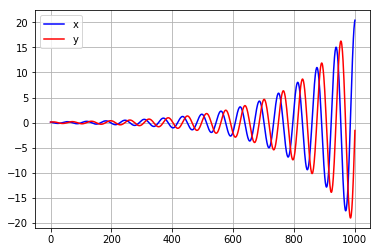

In [8]:
def plot_grad():
    def df(x,y):
        return y
    def dh(x,y):
        return -x
    
    n_epoch = 1000
    x = 0.1
    y = 0.1
    X = []
    Y = []
    Epochs = []
    X.append(x)
    Y.append(y)
    Epochs = [0]
    eta = 0.1
    for epoch in range(n_epoch):
        prev_x = x
        prev_y = y
        x = x - eta*df(prev_x,prev_y)
        y = y - eta*dh(prev_x,prev_y)
        
        X.append(x)
        Y.append(y)
        Epochs.append(epoch+1)
        
    X = np.asarray(X)
    Y = np.asarray(Y)
    Epochs = np.asarray(Epochs)
    plt.plot(Epochs,X,color="blue",label="x")
    plt.plot(Epochs,Y,color="red",label="y")
    
    plt.legend()
    plt.grid()
    plt.plot()
    
plot_grad()

### 上図のように、更新の度にx,yが大きくなってしまうため、勾配が爆発してしまいます。
### これを防止するために様々な学習手法が研究されています。
### ganの学習の際は十分に注意しましょう